## Unsupervised Learning

1. Dataset neither be classified nor labelled
2. Model will group the unsorted data based on similarities,differences, patterns without any prior training of data
3. Similar dataset will be group together called as cluster
   


## Types Of Unsupervised Learning
1. Clustering
2. Association
3. Dimensionality Reduction

## Heading

1. Line1
2. Line2
3. Line3

## Clustering

1. In clustering we can inherently grouping in data
2. Using clustering we can get labels for each group
3. This labels use for data segmentation
4. E.g. Cluster 0--low income high expense
        Cluster 1--high income high expense
        Cluster 2--high income low expense
        Cluster 3--low income low expense

## Types of Clustering

1. K-mean clustering
2. Hierarchical clustering
3. Principal Component analysis
4. Singular value decomposition
5. Independant component analysis

## K-mean Clustering

1. k= no of cluster
2. Randomly 2 data points called centroid.
3. Calculate distance from centroid, if distance is close to centriod , we can create cluster
4. Variance between two clusters should be high
5. Variance within cluster should be low

  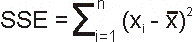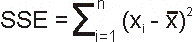

## Principal Component analysis

1. It is a dimensionality reduction technique
2. If 2 feature--> 2D graph, 3 features---> 3D graph, but n feature unable to plot graph
3. So here we can use dimensionality reduction technique
4. We cannot directly delete columns, we can compile columns and convert it into 3D

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel(r"H:\My Drive\ML\ML datasources\university.xlsx")

In [3]:
df.head()

,Univ,State,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,RI,1310,89,22,13,22704,94
1,CalTech,CA,1415,100,25,6,63575,81
2,CMU,PA,1260,62,59,9,25026,72
3,Columbia,NY,1310,76,24,12,31510,88
4,Cornell,NY,1280,83,33,13,21864,90


In [4]:
df.shape

(25, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Univ      25 non-null     object
 1   State     25 non-null     object
 2   SAT       25 non-null     int64 
 3   Top10     25 non-null     int64 
 4   Accept    25 non-null     int64 
 5   SFRatio   25 non-null     int64 
 6   Expenses  25 non-null     int64 
 7   GradRate  25 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.7+ KB


In [6]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [7]:
#for building model we require numerical dataset,we can scalling now
from sklearn.preprocessing import StandardScaler

In [8]:
df.drop("State",axis=1,inplace=True)

In [9]:
#seperate numerical column
df_new=df.drop("Univ",axis=1)

In [10]:
df_new

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90
5,1340,89,23,10,32162,95
6,1315,90,30,12,31585,95
7,1255,74,24,12,20126,92
8,1400,91,14,11,39525,97
9,1305,75,44,7,58691,87


In [11]:
for col in df_new:
    ss=StandardScaler()
    df_new[col]=ss.fit_transform(df_new[[col]])

In [12]:
#model building
km=KMeans(n_clusters=2)
km.fit(df_new)

KMeans(n_clusters=2)

In [13]:
#calculating variance withing cluster(WCSS)
km.inertia_

64.14528395010268

In [14]:
#as variance is high, we need more cluster
wcss=[]
cluster=list(range(1,10))
for k in cluster:
    km=KMeans(n_clusters=k)
    km.fit(df_new)
    wcss.append(km.inertia_)

#checking inertia of clusters
wcss

[149.99999999999997,
 64.47316262551324,
 47.472641168279125,
 34.57247133180153,
 30.12817213889986,
 25.18530342649363,
 25.175918904007315,
 16.143259056562833,
 14.256957422131322]

In [15]:
#checking clusters
cluster

[1, 2, 3, 4, 5, 6, 7, 8, 9]

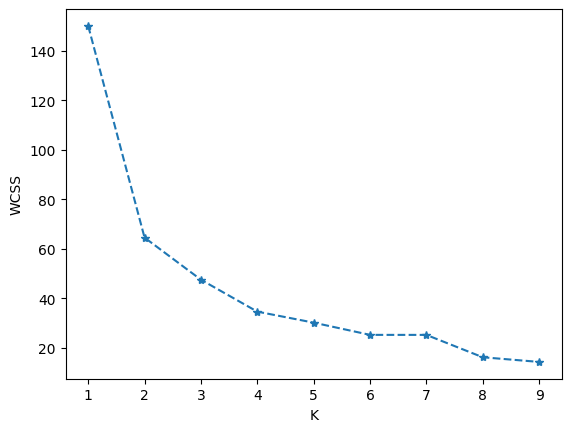

In [15]:
#plot of wcss vs cluster--> to decide which is good cluster
plt.figure()
plt.plot(cluster,wcss,"*--")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.show()

# here we can find cluster 1 and 2 drastic change.We find less change after 2.
# If we check variance is not that much decrese after cluster 3, so we can say that cluster 3 is best suited cluster

In [16]:
# final model
fm=KMeans(n_clusters=3)
fm.fit(df_new)

KMeans(n_clusters=3)

In [17]:
#adding labels to dataframes
fm.labels_

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0, 0,
       0, 2, 1])

In [20]:
df_new['Labels']=fm.labels_

In [21]:
df_new.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Labels
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303,1
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524,1
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634,0
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229,1
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587,0


In [22]:
#grouping the university according to labels..check university belonging to which label
df_new.groupby("Labels").mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Labels,,,,,,
0,-0.126589,0.064071,0.222467,0.045167,-0.380643,0.020282
1,0.817005,0.662294,-0.781691,-0.636906,0.794621,0.594945
2,-1.930292,-1.981486,1.593482,1.638574,-1.233599,-1.686804


In [23]:
df["Lables"]=fm.labels_

In [23]:
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Lables
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,1
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,1
6,Duke,1315,90,30,12,31585,95,1
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,1
9,JohnsHopkins,1305,75,44,7,58691,87,1


KeyError: "None of [Index(['Label'], dtype='object')] are in the [columns]"

## PCA

In [30]:
from sklearn.decomposition import PCA

In [31]:
pc=PCA(n_components=3,random_state=1)

In [37]:
df_new

In [35]:
components=pc.fit_transform(df_new)

ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
pc1=components[:,0]
pc2=components[:,1]
pc3=components[:,2]

In [ ]:
plt.figure()
sns.scatterplot(pc1,pc2,hue=df['Labels'])
plt.show()

In [ ]:
plt.figure()
plt.scatter(pc1,pc2,c= df_new['Labels'])
plt.show()